### SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.
1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [2]:
import numpy as np
def is_normalized(ket):
    # Check if the ket vector is normalized
    norm = np.linalg.norm(ket)
    return np.isclose(norm, 1)

def calculate_probability(position, ket):
    # Verify that both ket vectors are normalized
    if not is_normalized(ket):
        ket1 = ket1 / np.linalg.norm(ket)
    
    # Calculate the probability
    probability = abs(ket[position]) ** 2 
    return probability

def main():
    # Define the ket
    ket = [1/2, 1/2, 1/2, 1/2]
    # Define the position
    position = 2
    # Calculate the probability
    probability = calculate_probability(position, ket)
    # Print the probability
    print(probability)

main()


0.25


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [3]:
import numpy as np

def is_normalized(ket):
    # Check if the ket vector is normalized
    norm = np.linalg.norm(ket)
    return np.isclose(norm, 1)

def calculate_probability2(position, ket1, ket2):
    # Verify that both ket vectors are normalized
    if not is_normalized(ket1):
        ket1 = ket1 / np.linalg.norm(ket1)
    if not is_normalized(ket2):
        ket2 = ket2 / np.linalg.norm(ket2)
    
    # Calculate the probability
    probability = abs(np.inner(ket2,ket1)) ** 2 
    return probability

# Example usage
ket1 = [1/2, 1/2, 1/2, 1/2]
ket2 = [1/3, 1/3, 1/3, 0]
position = 2
probability2 = calculate_probability2(position, ket1, ket2)
print(probability2)


0.7499999999999999


### COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [4]:
import numpy as np
def calculate_transition_amplitude(bra, ket):
    # Calculate the inner product
    amplitude = np.inner(np.conjugate(bra), ket)
    return amplitude

# Example usage
bra = np.array([0.5, 0.5, 0.5, 0.5])
ket = np.array([0.33333333, 0.33333333, 0.33333333, 0])
transition_amplitude = calculate_transition_amplitude(bra, ket)
print(transition_amplitude)



0.499999995


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [5]:
import numpy as np

def is_hermitian(matrix):
    # Check if the matrix is Hermitian
    return np.allclose(matrix, matrix.conj().T)

def calculate_mean(matrix, ket):
    # Calculate the mean
    mean = np.real(np.inner(np.dot(matrix, ket).conj(), ket))
    return mean

def calculate_variance(matrix, ket):
    # Calculate the variance
    mean = calculate_mean(matrix, ket)
    mu = [[mean, 0], [0, mean]]
    key = np.dot(matrix - mu, matrix - mu)
    variance = np.real(np.inner(ket.conj(), np.dot(key, ket)))
    return variance

# Example usage
matrix = np.array([[1, -1j], [1j, 2]])
ket = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
if is_hermitian(matrix):
    mean = calculate_mean(matrix, ket)
    variance = calculate_variance(matrix, ket)
    print("Mean:", mean)
    print("Variance:", variance)
else:
    print("The matrix is not Hermitian.")


Mean: 2.4999999999999996
Variance: 0.25000000000000006


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [6]:
matrix = np.array([[-1, -1j], [1j, 1]])
eigenvalues, eigenvectors = np.linalg.eig(matrix)
ket = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
probability = abs(np.inner(eigenvectors.conj(), ket)) ** 2

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print("Probability:", probability)

Eigenvalues: [-1.41421356+0.j  1.41421356+0.j]
Eigenvectors: [[ 0.92387953+0.j         -0.        -0.38268343j]
 [-0.        -0.38268343j  0.92387953+0.j        ]]
Probability: [0.5 0.5]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices "Un" el sistema calcula el estado final a partir de un estado inicial.

In [7]:
import numpy as np

def calculate_final_state(initial_state, matrices):
    final_state = initial_state
    for matrix in matrices:
        final_state = np.dot(matrix, final_state)
    return final_state

# Example usage
initial_state = np.array([1, 0])
matrices = [np.array([[1, 0], [0, 1]]), np.array([[0, 1], [1, 0]])]
final_state = calculate_final_state(initial_state, matrices)
print("Final State:", final_state)



Final State: [0 1]


### REALICE LOS SIGUIENTES PROBLEMAS
#### 4.3.1
Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out

Exercise 4.2.2 Consider a particle in initial spin up. Apply Sx to it and determine the probability that the resulting state is still spin up.

In [29]:
import numpy as np
#Exercise 4.2.2
# Define the initial state
initial_state = np.array([1, 0])

# Define the Sx matrix
Sx = np.array([[0, 1], [1, 0]])

# Calculate the transition amplitude
transition_amplitude = np.abs(np.inner(initial_state, np.dot(Sx, initial_state))) ** 2

# Print the probability
print("Probability:", transition_amplitude)

#### 4.3.1

Sx = (1/2) * np.array([[0, 1], [1, 0]])
psi_initial = np.array([[1], [0]])  # Estado inicial: spin-up

# Aplicar el operador Sx al estado inicial
psi_final = np.dot(Sx, psi_initial)

# Calcular la probabilidad de transición a spin-up y spin-down
prob_spin_up = np.abs(np.dot(np.array([[1, 0]]), psi_final)) ** 2
prob_spin_down = np.abs(np.dot(np.array([[0, 1]]), psi_final)) ** 2

print("Probabilidad de transicionar a spin-up:", prob_spin_up[0])
print("Probabilidad de transicionar a spin-down:", prob_spin_down[0])




Probability: 0
Probabilidad de transicionar a spin-up: [0.]
Probabilidad de transicionar a spin-down: [0.25]


#### 4.3.2
 Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

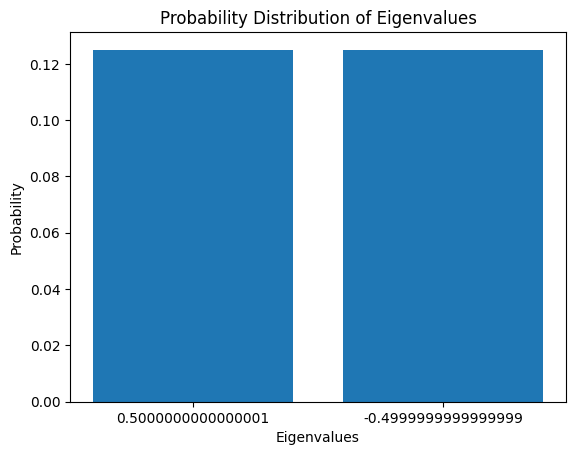

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el operador Sx y el estado inicial
Sx = (1/2) * np.array([[0, 1], [1, 0]])
psi_initial = np.array([[1], [0]])  # Estado inicial: spin-up

# Aplicar el operador Sx al estado inicial
psi_final = np.dot(Sx, psi_initial)

# Definir los autovectores y autovalores de Sx
eigenvalues, eigenvectors = np.linalg.eig(Sx)

# Calcular las probabilidades de transición a los autovectores
probabilities = np.abs(np.dot(eigenvectors.conj().T, psi_final)) ** 2

# Dibujar la distribución de probabilidad de los autovalores
plt.bar(range(len(eigenvalues)), probabilities.flatten())
plt.xticks(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Eigenvalues')
plt.ylabel('Probability')
plt.title('Probability Distribution of Eigenvalues')
plt.show()


#### 4.4.1
Verify that
Given two complex vectors 
$$ U_1 = \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix}\quad  and \quad U_2 = \begin{bmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ \frac{\sqrt{2}}{2} &-\frac{\sqrt{2}}{2} \end{bmatrix} $$



are unitary matrices. Multiply them and verify that their product is also unitary.


In [18]:
def is_unitary(matrix):
    identity = np.array([[1, 0], [0, 1]])
    product1 = np.dot(matrix, matrix.conj().T)
    product2 = np.dot(matrix.conj().T, matrix)
    return np.allclose(product1, product2, identity)

U1 = np.array([[0,1],[1,0]])
U2 = np.array([[np.sqrt(2)/2 ,np.sqrt(2)/2],[np.sqrt(2)/2, -np.sqrt(2)/2]])
if is_unitary(U1) and is_unitary(U2):
    print("U1 and U2 are unitary matrices")
else:
    print("U1 and U2 are not unitary matrices")

product = np.dot(U1, U2)
if is_unitary(product):
    print("The product of U1 and U2 is also a unitary matrix")
else:
    print("The product of U1 and U2 is not a unitary matrix")



U1 and U2 are unitary matrices
The product of U1 and U2 is also a unitary matrix


#### 4.4.1
Go back to Example 3.3.2 (quantum billiard ball), keep the same initial state vector $$[1, 0, 0, 0]^T$$, but change the unitary map to
$$  \begin{bmatrix} 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\ \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}} \\ 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \end{bmatrix} $$
Determine the state of the system after three time steps. What is the chance of
the quantum ball to be found at point 3?

In [26]:
m = np.array([[0  ,1/np.sqrt(2)  ,1/np.sqrt(2)  ,0], 
              [1j/np.sqrt(2),0   ,0  ,1/np.sqrt(2)], 
              [1/np.sqrt(2)  ,0  ,0  ,1j/np.sqrt(2)],
              [0  ,1/np.sqrt(2)  ,-1/np.sqrt(2)  ,0]])

v1 = np.array([[1,0,0,0]]).T
v2 = np.array([[0 + 0j, 0 + 0.70710678j, 0.70710678 + 0.j, 0 + 0.j]]).T
v3 = np.array([[ 0.5+0.5j ,  0. +0.j,  0. +0.j, -0.5+0.5j]]).T
state_after_one_click = np.dot(m, v1)
state_after_two_clicks = np.dot(m, v2)
state_after_three_clicks = np.dot(m, v3)
print("Result after one Click: \n", state_after_one_click)
print("Result after two Clicks: \n", state_after_two_clicks)
print("Result after three Clicks: \n", state_after_three_clicks)
print("The probability of the particle being at the third position after three clicks is:", abs(state_after_three_clicks[2])**2)

Result after one Click: 
 [[0.        +0.j        ]
 [0.        +0.70710678j]
 [0.70710678+0.j        ]
 [0.        +0.j        ]]
Result after two Clicks: 
 [[ 0.5+0.5j]
 [ 0. +0.j ]
 [ 0. +0.j ]
 [-0.5+0.5j]]
Result after three Clicks: 
 [[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
The probability of the particle being at the third position after three clicks is: [0.]
